# Phenotype Exploration
## This notebook helps us understand the phenotype we are using for GWAS

A GWAS is only as good as the phenotype that you use.  We will make two simple plots that can help us understand our phenotype better before we run GWAS.

The trait we will work on together is the flowering time of 200 *Arabidopsis thaliana* accessions (genotyped individuals) grown at 16 degrees in a growth chamber. (This is a subset of a much larger dataset: https://doi.org/10.1016/j.cell.2016.05.063).  
The phenotype is the number of days between seed planting and the opening of the first flower.  The values we are using are the means of multiple replicates, which is why we observe partial days in the data.

# 1.  Initial setup steps

## 1a. Prepare environment
Loading packages and functions into R

In [4]:
# install.packages('ggplot2')  # uncomment if the package is not installed
# install.packages('maps')   # uncomment if the package is not installed
library(ggplot2) 
library(maps)

## 1b. Setup
Define input variables, paths and files

In [25]:
path.data <- './data/'
path.figures <- './figures/'
if (!file.exists(path.figures)) dir.create(path.figures)


# the phenotypes
pheno.file <- paste(path.data, "subset_flowering_time_16.csv", sep = '') # two columns giving ecotypeid and phenotype

# the collection location for each accession (latitude and longitude)
# (an accession is a plant whose genotype we know.  For A. thaliana, these were originally collected from the field.)
accession.pos.file <- paste(path.data, "/accession_geo_locations.csv", sep = '') # 5 columns: ecotypeid, collection location name, country, latitude, and longitude for all accession in the 1001 genomes dataset

# 2.  Distribution of phenotypic values

Is it sensible to use this data in a mixed linear model GWAS?  General questions to ask about a trait include: Is the trait quantitative?  Is the distribution likely to result in normally-distributed residuals in the linear model we use for GWAS?  A simple histogram is a good first check.

[1] 200   2

,ecotypeid,flowering_time_16
,<int>,<dbl>
1,770,72.25000
2,801,88.25000
3,991,106.75000
4,1062,68.25000
5,1367,88.75000
6,1853,69.33333


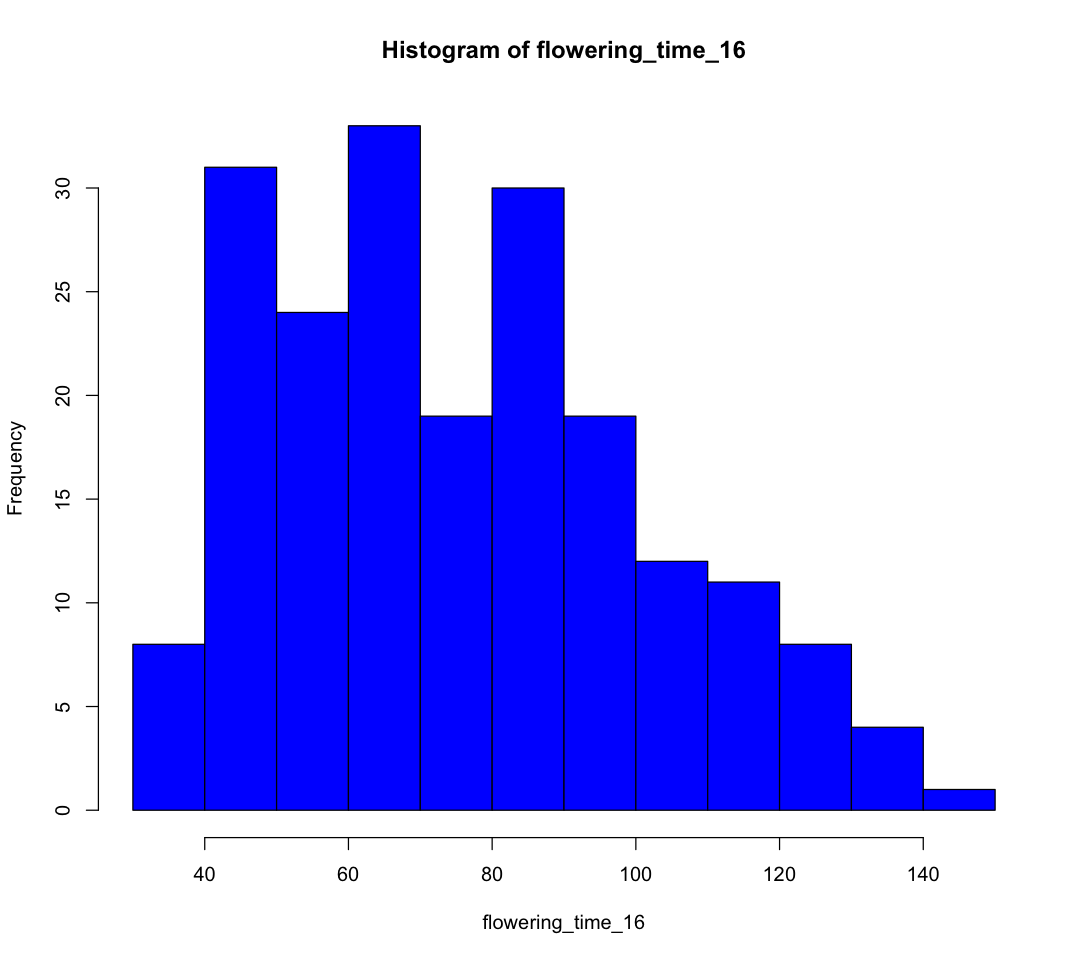

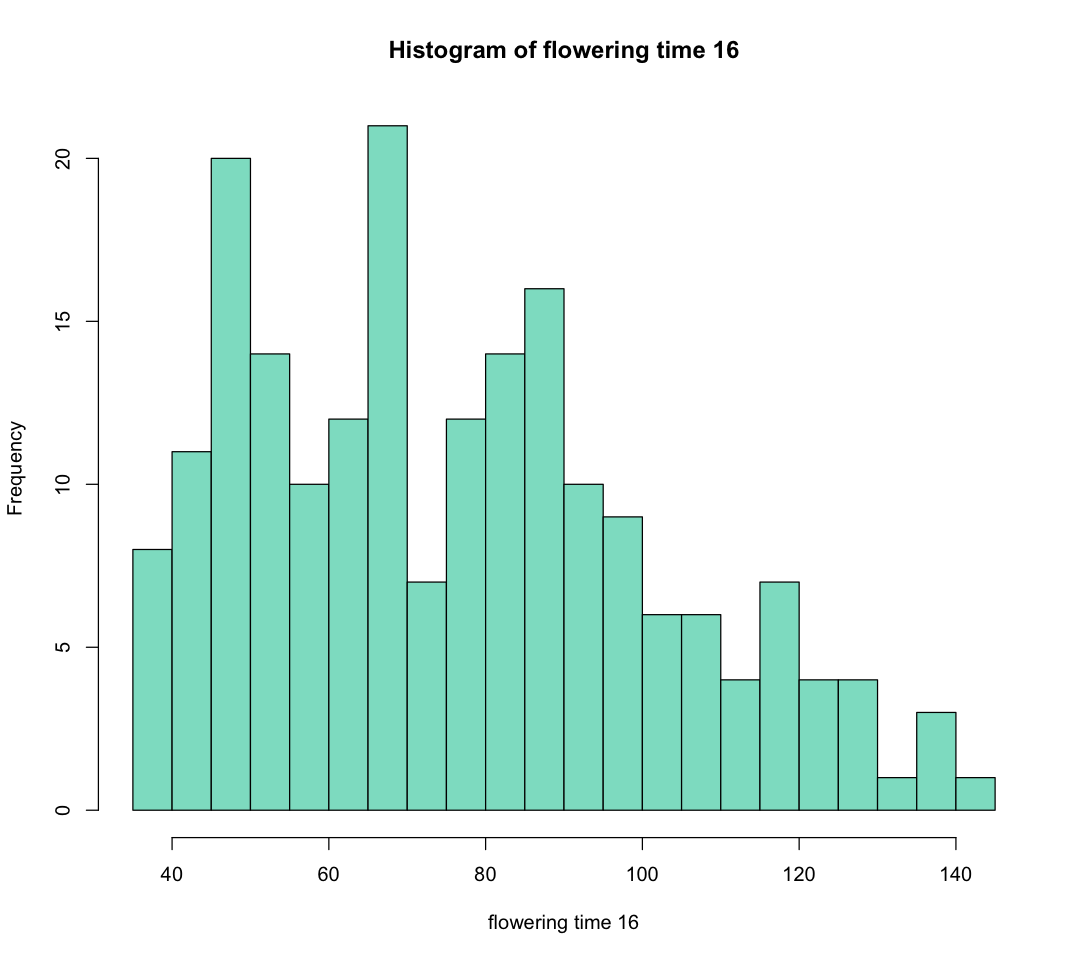

In [20]:
# load phenotype data
pheno <- read.csv(pheno.file)

# check format of data
dim(pheno)
head(pheno)

# make a histogram
i.phen = 2  # Note: use numbers as mush as possible in your code, so that put them in variables! 
pheno.name <- colnames(pheno)[i.phen]
hist(pheno[,i.phen], 
     xlab=pheno.name, 
     main=paste("Histogram of ", pheno.name, sep=""), 
     col="blue")

# spare no effort in enhancing the beauty of the image
hist(pheno$flowering_time_16,  # Note: this works if your object is a data.frame
     breaks = 20,
     xlab=gsub("\\_", " ", pheno.name),  # replace '_' with space
     main=paste("Histogram of ", gsub("\\_", " ", pheno.name), sep=""), 
     col="#8DDFCB")  # Note: color can be beautiful and in hex notation




#### ggplot2 alternative:
If you want to make a similar plot using ggplot2, you'd need to follow a slightly different approach:

pdf 
  2

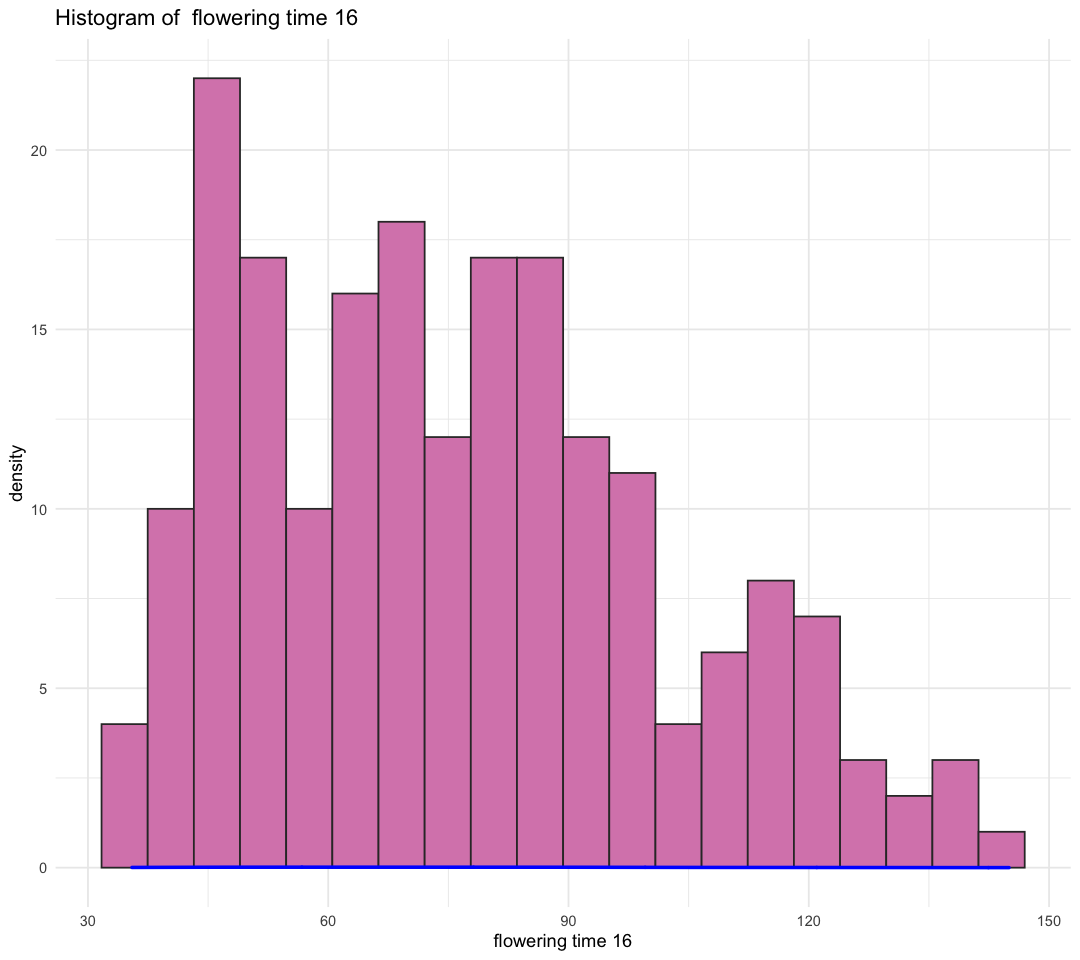

In [28]:
p <- ggplot(pheno, aes(x=flowering_time_16)) + 
  geom_histogram(bins=20, fill="#D988B9", color = 'grey20') + 
  labs(x=gsub("\\_", " ", pheno.name),
       title=paste("Histogram of ", gsub("\\_", " ", pheno.name))) + 
  theme_minimal()
p

# Save the figure
pdf(paste(path.figures, 'histogram_', pheno.name,'.pdf', sep = ''), width = 8, height = 5)
print(p)    
dev.off()


### Although the flowering time data doesn't have a beautiful normal distribution, we would consider it "close enough" to use in GWAS.

## 3.  Geographic distribution of trait values.
How much of a problem will population structure likely be?

In *Arabidopsis thaliana*, accessions that are geographically close tend to be more closely related than those that are further apart.  Another way of saying this is that population structure in the species largely reflects geography.  Strong geographic patterns in phenotypic values can therefore be a warning sign that population structure confounding will be high in an *A. thaliana* GWAS, so let's plot phenotypic values on a map to look for concerning patterns in our data.

In [15]:
# read in accession origin data
pos <- read.csv(accession.pos.file, stringsAsFactors=TRUE, header=TRUE)

# merge this data with the phenotype variable
pheno <- merge(pheno, pos)
head(pheno)


,ecotypeid,flowering_time_16,name,country,latitude,longitude
,<int>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,801,88.25000,KYC-33,USA,37.91690,-84.46390
2,991,106.75000,Ale-Stenar-41-1,SWE,55.38226,14.05268
3,1062,68.25000,Brösarp-15-138,SWE,55.71670,14.13330
4,1853,69.33333,MNF-Pot-21,USA,43.59500,-86.26570
5,2016,69.75000,MNF-Pin-39,USA,43.53560,-86.17880
6,4807,87.50000,UKSW06-207,UK,50.40000,-4.90000


Warning message:
“Removed 28 rows containing missing values (geom_point).”


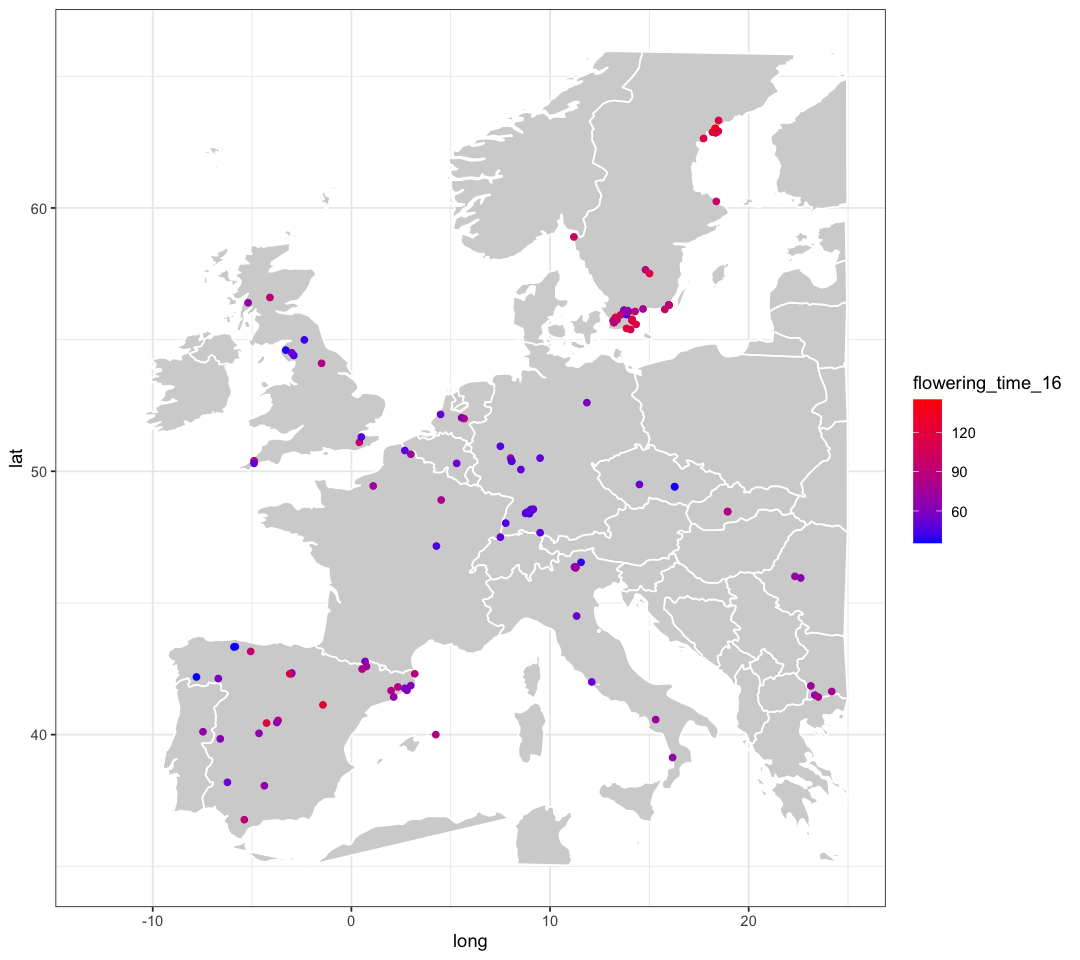

In [18]:
# download map data
world_map <- map_data("world")
# plot map using ggplot2 package
europe_map <- ggplot(world_map, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill="lightgray", colour = "white") +
  xlim(-13, 25) +
  ylim(35, 66) +
  geom_point(data=pheno, aes(x = longitude, y=latitude, colour=get(pheno.name)), inherit.aes = FALSE) +
  labs(colour=pheno.name) +
  scale_color_gradient(low = "blue", high = "red") +
  theme(text = element_text(size = 18)) +
  theme_bw()
 
options(repr.plot.width=9, repr.plot.height=8)
europe_map

 ### Given the strong geographic pattern in flowering time, I would predict that we will observe very strong population structure confounding for this trait!  We will look at this prediction more closely in notebook 3.
 ## But first we need to run the GWAS, so let's move on to 2_GWAS.ipynb where we will do just that.